In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# Approximating a Poisson Process

There is as famous statistical feature that as Poisson process can be approximated by a normal distribution. We're not going to cover the statics that generate this here (we might in 203, but in my view this is a piece of potentially useful information further down the line of one's statistics training.

Here is the claim: 

For some values of $\lambda$ (which is the shape parameter of a Poisson distribution), and for some number of draws $n$, then two random variables $A$ and $B$, where: 

\begin{align*}
A \sim Poisson(\lambda=\lambda) \\ 
B \sim Normal(\mu=\lambda, \sigma^{2}=\lambda)
\end{align*}

Are reasonable approximations for one another. (For context, this there are ways to demonstrate this with the *Central Limit Theorem*, but also with closed from statistics as well. 

# Your task

In this exercise, we would like you to develop this intuition through simulation. 

Create a data frame that has the following columns: 

- An index column that ranges from 0 (i.e. not zero) to 9,999. This is going to enumerate each value in our "population". 
- 20 columns that contain values drawn from a Poisson process; set the scale parameter for this process to range from very small (it must be positive though) to quite large (maybe 10,000?). 
- On a separate DataFrame, 20 columns that contain values drawn from a Normal process with `loc=lambda` and `scale=lamba**0.5`. 
- Create a process that will sample through samples of the data frame that range from quite small to quite large (i.e. 3 - 10,000). 
- Create a plot or series of plots that you think makes the clearest statement of where this approximation starts be useful. 
    - You could write a for-loop to make all these plots. 
    - But, I suspect you'll find it easier to melt the data, and then use `seaborn` faceting arguments. 

In [41]:
'''
np.random.poisson(..., size = []) 
np.random.normal(..., size = [])
'''

df_poisson = 'pd.DataFrame()'
df_normal  = 'pd.DataFrame()' 

In [87]:
lamb = [0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 10.0, 
       20, 30, 50, 100, 200, 300, 500, 10000, 5000, 10000]
s = 10

In [88]:
df_poisson = pd.DataFrame(
    np.random.poisson(
        lam=lamb, size = [1000, len(lamb)]))

In [89]:
df_normal = pd.DataFrame(
    np.random.normal(
        loc = lamb, scale = np.sqrt(lamb), size = 10000)

In [90]:
df_poisson_melt = pd.melt(df_poisson)
df_normal_melt = pd.melt(df_normal)

df_poisson_melt['dist'] = 'poission'
df_normal_melt['dist'] = 'normal'

df_melt = pd.concat([df_normal_melt, df_poisson_melt])

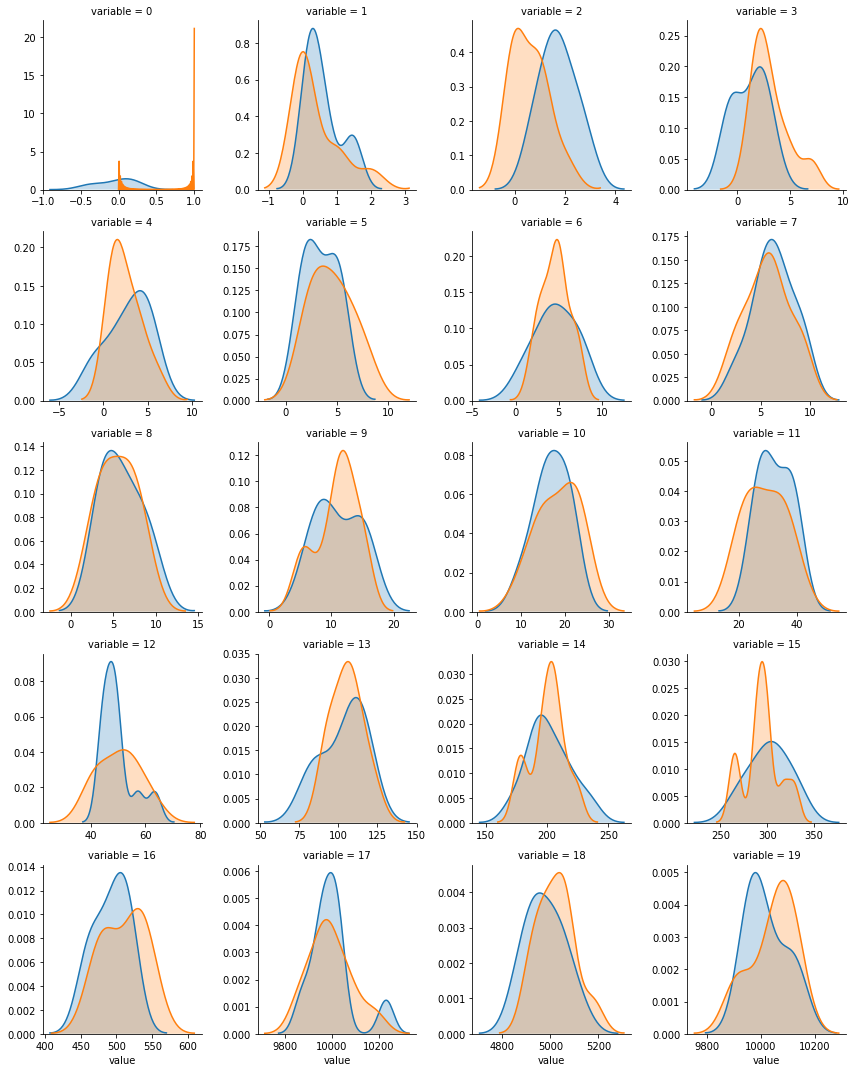

In [91]:
g = sns.FacetGrid(df_melt, col = 'variable', hue = 'dist', col_wrap = 4, sharex = False, sharey = False)
g.map(sns.kdeplot, 'value', shade = True)

'2.7.17 (default, Jan 22 2020, 13:52:34) \n[GCC 4.2.1 Compatible Apple LLVM 11.0.0 (clang-1100.0.33.17)]'

In [108]:
def poisson_simulation(s, lamb): 
    '''
    args: 
    -----
      - size = the size of the sample to be taken from the population
      - lamb = the vector of lambdas that we are searching across
    '''
    
    f'Simulation running with sample of size: {s}.'
    
    df_poisson = pd.DataFrame(
        np.random.poisson(
            lam=lamb, size = [s, len(lamb)]))
    df_normal = pd.DataFrame(
        np.random.normal(
            loc = lamb, scale = np.sqrt(lamb), size = [s, len(lamb)]))
    
    df_poisson_melt = pd.melt(df_poisson)
    df_normal_melt = pd.melt(df_normal)

    df_poisson_melt['dist'] = 'poission'
    df_normal_melt['dist'] = 'normal'

    df_melt = pd.concat([df_normal_melt, df_poisson_melt])
    
    g = sns.FacetGrid(df_melt, col = 'variable', hue = 'dist', col_wrap = 4, sharex = False, sharey = False)
    g.map(sns.kdeplot, 'value', shade = True)

100


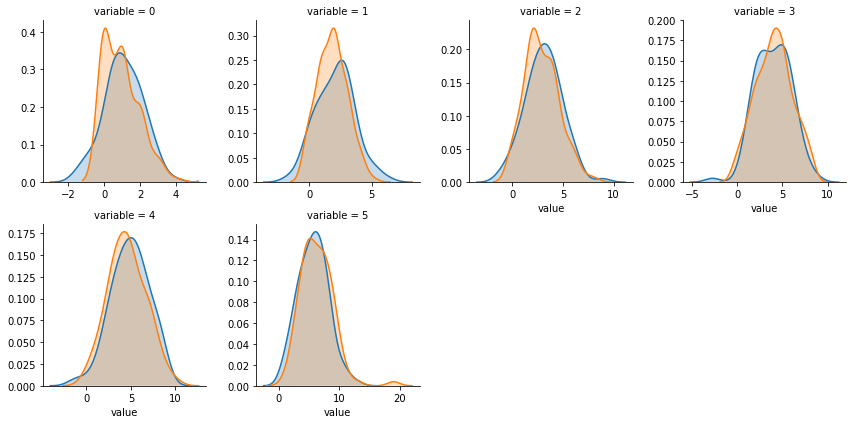

In [109]:
poisson_simulation(100, [1,2,3, 4,5,6])